# Testing Gardin et al.'s RTT against peak frequency

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4371865/pdf/elife03735.pdf

In [30]:
import pandas as pd
import cPickle as pkl

Table 2 of the paper, copied from the HTML:

In [31]:
html_string = """
<table><thead><tr><th colspan="5">A</th></tr><tr><th>Codon</th><th>AA</th><th>Usage</th><th>RRT</th><th>p value</th></tr></thead><tbody><tr><td>CTC</td><td>Leu</td><td>5.4</td><td>1.89</td><td>*0.0001</td></tr><tr><td>CCC</td><td>Pro</td><td>6.8</td><td>1.71</td><td>*0.0001</td></tr><tr><td>GGG</td><td>Gly</td><td>6</td><td>1.61</td><td>*0.0001</td></tr><tr><td>AGG</td><td>Arg</td><td>9.2</td><td>1.59</td><td>*0.0001</td></tr><tr><td>ATA</td><td>Ile</td><td>17.8</td><td>1.57</td><td>*0.0001</td></tr><tr><td>GGA</td><td>Gly</td><td>10.9</td><td>1.56</td><td>*0.0001</td></tr><tr><td>TGG</td><td>Trp</td><td>10.4</td><td>1.53</td><td>*0.0001</td></tr><tr><td>GTG</td><td>Val</td><td>10.8</td><td>1.52</td><td>*0.0001</td></tr><tr><td>CGC</td><td>Arg</td><td>2.6</td><td>1.45</td><td>*0.0001</td></tr><tr><td>CGA</td><td>Arg</td><td>3</td><td>1.45</td><td>*0.0008</td></tr><tr><td>CGG</td><td>Arg</td><td>1.7</td><td>1.44</td><td>*0.0010</td></tr><tr><td>TCG</td><td>Ser</td><td>8.6</td><td>1.43</td><td>*0.0001</td></tr><tr><td>CCA</td><td>Pro</td><td>18.3</td><td>1.38</td><td>*0.0001</td></tr><tr><td>ACA</td><td>Thr</td><td>17.8</td><td>1.35</td><td>*0.0001</td></tr><tr><td>CCG</td><td>Pro</td><td>5.3</td><td>1.31</td><td>*0.0001</td></tr><tr><td>GTA</td><td>Val</td><td>11.8</td><td>1.31</td><td>*0.0001</td></tr><tr><td>GCA</td><td>Ala</td><td>16.2</td><td>1.28</td><td>*0.0001</td></tr><tr><td>CCT</td><td>Pro</td><td>13.5</td><td>1.27</td><td>*0.0001</td></tr><tr><td>TCA</td><td>Ser</td><td>18.7</td><td>1.26</td><td>*0.0001</td></tr><tr><td>TAC</td><td>Tyr</td><td>14.8</td><td>1.25</td><td>*0.0001</td></tr><tr><td>TAT</td><td>Tyr</td><td>18.8</td><td>1.25</td><td>*0.0001</td></tr><tr><td>GAG</td><td>Glu</td><td>19.2</td><td>1.25</td><td>*0.0001</td></tr><tr><td>CTA</td><td>Leu</td><td>13.4</td><td>1.25</td><td>*0.0001</td></tr><tr><td>CTT</td><td>Leu</td><td>12.3</td><td>1.24</td><td>*0.0001</td></tr><tr><td>TGC</td><td>Cys</td><td>4.8</td><td>1.23</td><td>*0.0001</td></tr><tr><td>GGC</td><td>Gly</td><td>9.8</td><td>1.22</td><td>*0.0001</td></tr><tr><td>CAG</td><td>Gln</td><td>12.1</td><td>1.15</td><td>*0.0002</td></tr><tr><td>ACG</td><td>Thr</td><td>8</td><td>1.12</td><td>0.0069</td></tr><tr><td>AGT</td><td>Ser</td><td>14.2</td><td>1.10</td><td>0.0060</td></tr><tr><td>AGC</td><td>Ser</td><td>9.8</td><td>1.09</td><td>0.0213</td></tr><tr><td>CAC</td><td>His</td><td>7.8</td><td>1.08</td><td>0.0098</td></tr><tr><td>TTT</td><td>Phe</td><td>26.1</td><td>1.05</td><td>0.0529</td></tr><tr><td>GAA</td><td>Glu</td><td>45.6</td><td>1.04</td><td>0.0538</td></tr><tr><td>AGA</td><td>Arg</td><td>21.3</td><td>1.01</td><td>0.3014</td></tr><tr><td>TTC</td><td>Phe</td><td>18.4</td><td>1.00</td><td>0.4955</td></tr><tr><td>GCG</td><td>Ala</td><td>6.2</td><td>0.99</td><td>0.4650</td></tr><tr><td>TCC</td><td>Ser</td><td>14.2</td><td>0.99</td><td>0.3341</td></tr><tr><td>TTA</td><td>Leu</td><td>26.2</td><td>0.99</td><td>0.3166</td></tr><tr><td>TCC</td><td>Ser</td><td>23.5</td><td>0.98</td><td>0.2249</td></tr><tr><td>CAT</td><td>His</td><td>13.6</td><td>0.93</td><td>0.0188</td></tr><tr><td>GGT</td><td>Gly</td><td>23.9</td><td>0.93</td><td>*0.0003</td></tr><tr><td>ATG</td><td>Met</td><td>20.9</td><td>0.92</td><td>0.0027</td></tr><tr><td>ATT</td><td>Ile</td><td>30.1</td><td>0.92</td><td>*0.0005</td></tr><tr><td>TTG</td><td>Leu</td><td>27.2</td><td>0.92</td><td>*0.0001</td></tr><tr><td>CTG</td><td>Leu</td><td>10.5</td><td>0.92</td><td>0.0139</td></tr><tr><td>AAT</td><td>Asn</td><td>35.7</td><td>0.88</td><td>*0.0001</td></tr><tr><td>AAA</td><td>Lys</td><td>41.9</td><td>0.88</td><td>*0.0003</td></tr><tr><td>CGT</td><td>Arg</td><td>6.4</td><td>0.87</td><td>*0.0002</td></tr><tr><td>CAA</td><td>Gln</td><td>27.3</td><td>0.87</td><td>*0.0001</td></tr><tr><td>GCC</td><td>Ala</td><td>12.6</td><td>0.86</td><td>*0.0001</td></tr><tr><td>GAC</td><td>Asp</td><td>20.2</td><td>0.85</td><td>*0.0001</td></tr><tr><td>TGT</td><td>Cys</td><td>8.1</td><td>0.81</td><td>*0.0001</td></tr><tr><td>GCT</td><td>Ala</td><td>21.2</td><td>0.81</td><td>*0.0001</td></tr><tr><td>ATC</td><td>Ile</td><td>17.2</td><td>0.80</td><td>*0.0001</td></tr><tr><td>ACT</td><td>Thr</td><td>20.3</td><td>0.78</td><td>*0.0001</td></tr><tr><td>GAT</td><td>Asp</td><td>37.6</td><td>0.76</td><td>*0.0001</td></tr><tr><td>AAC</td><td>Asn</td><td>24.8</td><td>0.76</td><td>*0.0001</td></tr><tr><td>GTT</td><td>Val</td><td>22.1</td><td>0.75</td><td>*0.0001</td></tr><tr><td>GTC</td><td>Val</td><td>11.8</td><td>0.75</td><td>*0.0001</td></tr><tr><td>AAG</td><td>Lys</td><td>30.8</td><td>0.74</td><td>*0.0001</td></tr><tr><td>ACC</td><td>Thr</td><td>12.7</td><td>0.70</td><td>*0.0001</td></tr></tbody></table>
"""

In [32]:
df = pd.read_html(html_string)[0]
newcolumns = df.columns[1:]
df = df.drop('p value', 1)
df.columns = newcolumns
df.head()

,Codon,AA,Usage,RRT,p value
0,CTC,Leu,5.4,1.89,*0.0001
1,CCC,Pro,6.8,1.71,*0.0001
2,GGG,Gly,6.0,1.61,*0.0001
3,AGG,Arg,9.2,1.59,*0.0001
4,ATA,Ile,17.8,1.57,*0.0001


In [33]:
peak_frequency = pkl.load(open("../../parameters/peak_frequency_df.p"))

In [34]:
peak_frequency.head()

,anticodon,peak_frequency
0,cuu,0.001600
1,ucu,0.001708
2,aac,0.001936
3,gcc,0.001987
4,ugg,0.002439


In [35]:
codon_anticodon = {
    'uuu': 'gaa', 'ucu': 'aga', 'uau': 'gua', 'ugu': 'gca',
    'uuc': 'gaa', 'ucc': 'aga', 'uac': 'gua', 'ugc': 'gca',
    'uua': 'uaa', 'uca': 'uga', 'uaa': '*', 'uga': '*',  # '*'==stop
    'uug': 'caa', 'ucg': 'cga', 'uag': '*', 'ugg': 'cca',
    'cuu': 'gag', 'ccu': 'agg', 'cau': 'gug', 'cgu': 'acg',
    'cuc': 'gag', 'ccc': 'agg', 'cac': 'gug', 'cgc': 'acg',
    'cua': 'uag', 'cca': 'ugg', 'caa': 'uug', 'cga': 'acg',
    'cug': 'uag', 'ccg': 'ugg', 'cag': 'cug', 'cgg': 'ccg',
    'auu': 'aau', 'acu': 'agu', 'aau': 'guu', 'agu': 'gcu',
    'auc': 'aau', 'acc': 'agu', 'aac': 'guu', 'agc': 'gcu',
    'aua': 'uau', 'aca': 'ugu', 'aaa': 'uuu', 'aga': 'ucu',
    'aug': 'cau', 'acg': 'cgu', 'aag': 'cuu', 'agg': 'ccu',
    'guu': 'aac', 'gcu': 'agc', 'gau': 'guc', 'ggu': 'gcc',
    'guc': 'aac', 'gcc': 'agc', 'gac': 'guc', 'ggc': 'gcc',
    'gua': 'uac', 'gca': 'ugc', 'gaa': 'uuc', 'gga': 'ucc',
    'gug': 'cac', 'gcg': 'ugc', 'gag': 'cuc', 'ggg': 'ccc'
}

In [36]:
df['anticodon'] = df['Codon'].str.lower().str.replace('t', 'u').map(codon_anticodon)

In [37]:
df = df.drop('Codon', 1)
df

,AA,Usage,RRT,p value,anticodon
0,Leu,5.4,1.89,*0.0001,gag
1,Pro,6.8,1.71,*0.0001,agg
2,Gly,6.0,1.61,*0.0001,ccc
3,Arg,9.2,1.59,*0.0001,ccu
4,Ile,17.8,1.57,*0.0001,uau
5,Gly,10.9,1.56,*0.0001,ucc
6,Trp,10.4,1.53,*0.0001,cca
7,Val,10.8,1.52,*0.0001,cac
8,Arg,2.6,1.45,*0.0001,acg
9,Arg,3.0,1.45,*0.0008,acg


In [38]:
anticodon_rrt = df.groupby(['anticodon']).mean()
anticodon_rrt

,Usage,RRT
anticodon,,
aac,16.95,0.750000
aau,23.65,0.860000
acg,4.00,1.256667
aga,18.85,0.985000
agc,16.90,0.835000
agg,10.15,1.490000
agu,16.50,0.740000
caa,27.20,0.920000
cac,10.80,1.520000


In [39]:
df_merged = anticodon_rrt.merge(peak_frequency, how='outer', left_index=True, right_on='anticodon')

In [40]:
df_merged

,Usage,RRT,anticodon,peak_frequency
2,16.95,0.750000,aac,0.001936
12,23.65,0.860000,aau,0.003509
10,4.00,1.256667,acg,0.003357
13,18.85,0.985000,aga,0.003539
9,16.90,0.835000,agc,0.002932
35,10.15,1.490000,agg,0.045574
8,16.50,0.740000,agu,0.002685
5,27.20,0.920000,caa,0.002448
29,10.80,1.520000,cac,0.021229
19,20.90,0.920000,cau,0.007732


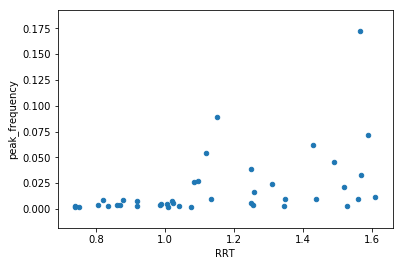

In [41]:
df_merged.plot.scatter('RRT', 'peak_frequency')

Spearman rank correlation between RRT and peak_frequency:

In [42]:
df_merged.corr(method='spearman')

,Usage,RRT,peak_frequency
Usage,1.000000,-0.66748,-0.452478
RRT,-0.667480,1.00000,0.614540
peak_frequency,-0.452478,0.61454,1.000000


61% Spearman correlation between RRT and peak_frequency - better than expected!